# Movie Ratings
> How do my ratings compare to the population rating on TMDb?

- toc:true
- badges: true
- author: Sanyam Kapoor
- categories: [movies, boxplot]

In [1]:
#collapse-hide

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2., style='whitegrid')

In [2]:
#collapse-hide

import sys
from pathlib import Path

plotfiles_module_path = Path('.') / '..' / 'src'

if plotfiles_module_path not in sys.path:
  sys.path.insert(0, str(plotfiles_module_path.resolve()))

from plotfiles.dataset import load_movies

movies = load_movies()

In [3]:
#collapse-hide

ratings_by_year = movies[['id', 'release_year']].merge(
  movies.set_index('id')[['vote_average', 'rating']].stack().reset_index().rename(columns={ 'level_1': 'type', 0: 'rating' }),
  on='id', how='left')
ratings_by_year.release_year = ratings_by_year.release_year.astype('category')
ratings_by_year.type = ratings_by_year.type.astype('category')

## Distribution of Ratings

Perhaps, I am generous with my ratings when compared to the raters on TMDb.

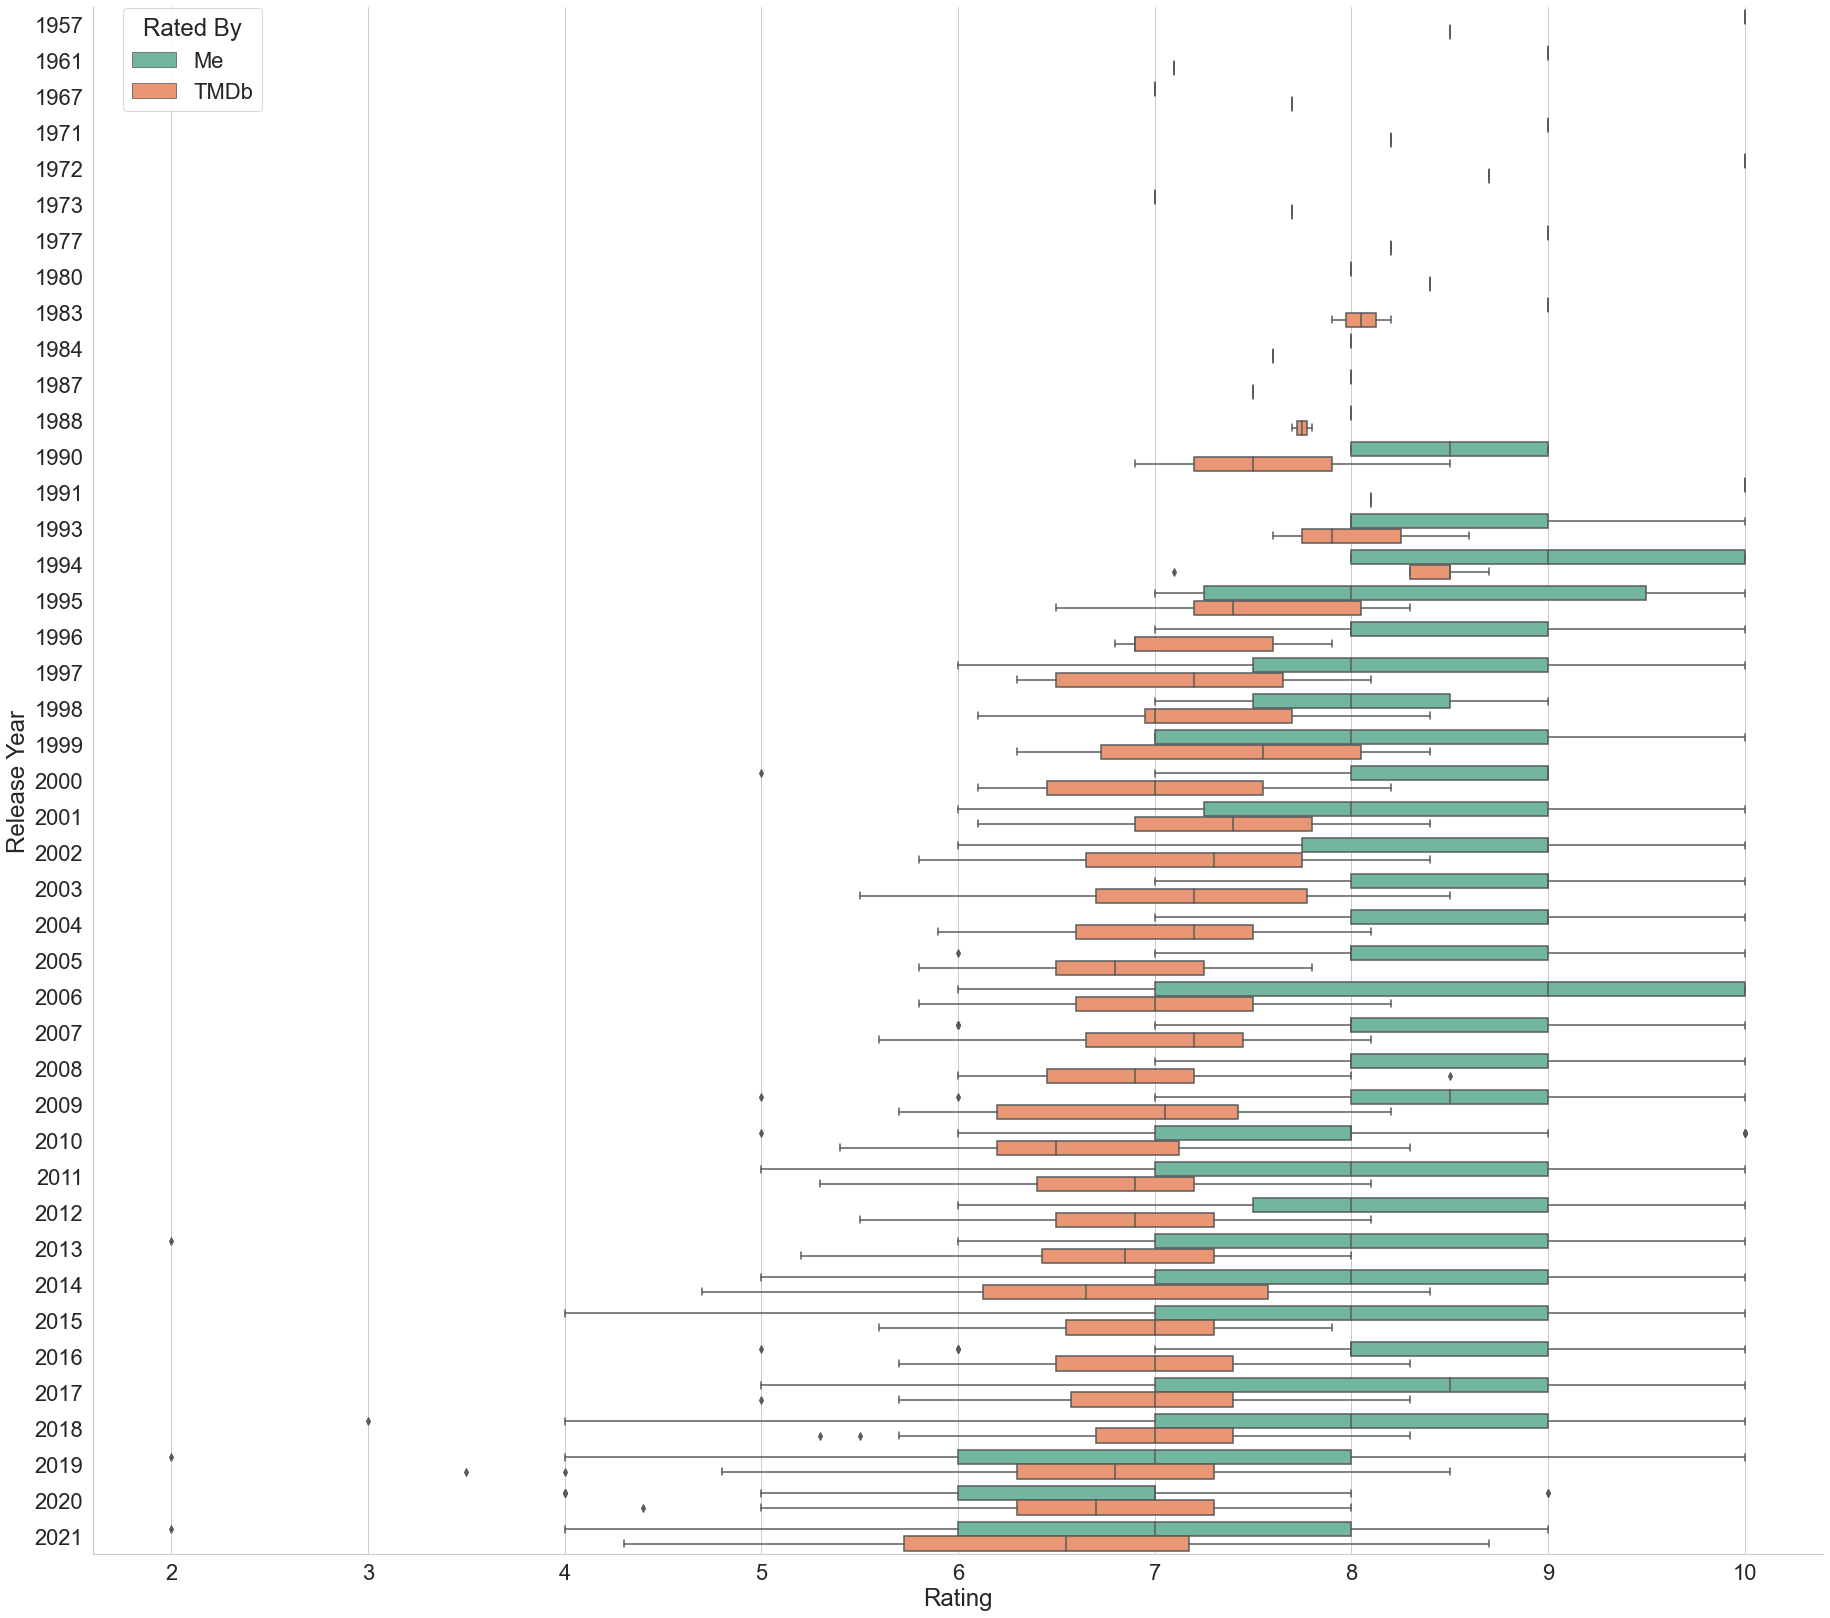

In [4]:
#collapse-hide

g = sns.catplot(data=ratings_by_year, y='release_year', x='rating', kind='box',
                hue='type', height=23, aspect=1., palette=sns.color_palette('Set2'))

g.set(xlabel='Rating', ylabel='Release Year')
g.legend.set(visible=False)
handles, labels = g.ax.get_legend_handles_labels()
g.fig.legend(bbox_to_anchor=(.07, .99), loc='upper left', title='Rated By',
             handles=handles, labels=['Me', 'TMDb'])
g.fig.tight_layout()